# ImageNet

ImageNet: http://www.image-net.org/challenges/LSVRC/

ILSVRC 2015 devkit: http://image-net.org/challenges/LSVRC/2015/downloads

Academic Torrents: https://academictorrents.com/collection/imagenet-lsvrc-2015

# Preparing the ImageNet Dataset

## Train Directory

In [ ]:
import pathlib

image_net_train_path = pathlib.Path('/data/image-net/ILSVRC2012_img_train')
for file in image_net_train_path.glob("*"):
    print(str(file))

In [ ]:
import pathlib
from tqdm import tqdm

image_net_train_path = pathlib.Path('/data/image-net/ILSVRC2012_img_train')

for file in tqdm(list(image_net_train_path.glob("*"))):
    if(str(file).endWith('tar')):
        class_name = str(file).split('/')[-1].split('.')[0]
        tar = tarfile.open(str(file))
        tar.extractall(path='/data/image-net/ILSVRC2012_img_train/' + class_name)
        tar.close()

## WordNet

In [1]:
!head -n 10 /data/image-net/ILSVRC2015/devkit/data/map_clsloc.txt

n02119789 1 kit_fox
n02100735 2 English_setter
n02110185 3 Siberian_husky
n02096294 4 Australian_terrier
n02102040 5 English_springer
n02066245 6 grey_whale
n02509815 7 lesser_panda
n02124075 8 Egyptian_cat
n02417914 9 ibex
n02123394 10 Persian_cat


## WordNet Label Encoder

In [12]:
from sklearn.preprocessing import LabelEncoder

wordnet_path = '/data/image-net/ILSVRC2015/devkit/data/map_clsloc.txt'
wordnet_dic = {}

with open(wordnet_path) as file:
    for line in file:
        wordnet_dic[line.split()[0]] = line.split()
        
le = LabelEncoder()

le.fit(list(wordnet_dic.keys()))

print(le.classes_)

print(le.transform(['n02119789', 'n02100735', 'n02110185', 'n02096294']))

print(le.inverse_transform([278, 212, 250, 193]))

['n01440764' 'n01443537' 'n01484850' 'n01491361' 'n01494475' 'n01496331'
 'n01498041' 'n01514668' 'n01514859' 'n01518878' 'n01530575' 'n01531178'
 'n01532829' 'n01534433' 'n01537544' 'n01558993' 'n01560419' 'n01580077'
 'n01582220' 'n01592084' 'n01601694' 'n01608432' 'n01614925' 'n01616318'
 'n01622779' 'n01629819' 'n01630670' 'n01631663' 'n01632458' 'n01632777'
 'n01641577' 'n01644373' 'n01644900' 'n01664065' 'n01665541' 'n01667114'
 'n01667778' 'n01669191' 'n01675722' 'n01677366' 'n01682714' 'n01685808'
 'n01687978' 'n01688243' 'n01689811' 'n01692333' 'n01693334' 'n01694178'
 'n01695060' 'n01697457' 'n01698640' 'n01704323' 'n01728572' 'n01728920'
 'n01729322' 'n01729977' 'n01734418' 'n01735189' 'n01737021' 'n01739381'
 'n01740131' 'n01742172' 'n01744401' 'n01748264' 'n01749939' 'n01751748'
 'n01753488' 'n01755581' 'n01756291' 'n01768244' 'n01770081' 'n01770393'
 'n01773157' 'n01773549' 'n01773797' 'n01774384' 'n01774750' 'n01775062'
 'n01776313' 'n01784675' 'n01795545' 'n01796340' 'n

## Validate Directory

In [ ]:
image_net_valid_path = pathlib.Path('/data/image-net/ILSVRC2012_img_val')
for item in image_net_valid_path.glob("*"):
    print(str(item))

## Validate Ground True

In [ ]:
# ground true (WordNet ID)
!head -n 10 /data/image-net/ILSVRC2015/devkit/data/ILSVRC2015_clsloc_validation_ground_truth.txt

## Validate Blacklist

In [ ]:
# blacklist (WordNet ID)
!head -n 10 /data/image-net/ILSVRC2015/devkit/data/ILSVRC2015_clsloc_validation_blacklist.txt

# ImageNet Dataset

In [3]:
import os
import matplotlib.pyplot as plt

import tensorflow as tf

# Reads an image from a file, decodes it into a dense tensor
def parse_image(filename):
    label = tf.strings.split(filename, os.sep)[-2]
    image = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    return image, label


def show(image, label):
    plt.figure()
    plt.imshow(image)
    plt.title(label.numpy().decode('utf-8'))

In [4]:
imagenet_train_dir = '/data/image-net/ILSVRC2012_img_train/'
imagenet_files = tf.data.Dataset.list_files(imagenet_train_dir + '*/*')
imagenet_train_ds = imagenet_files.map(parse_image)

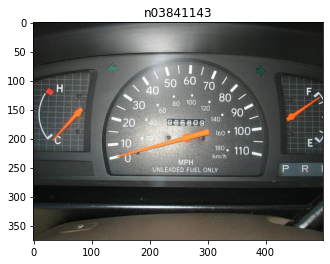

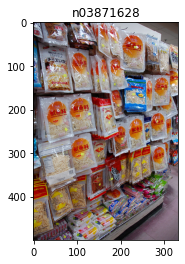

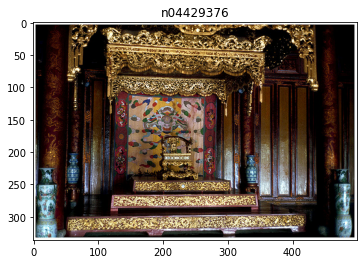

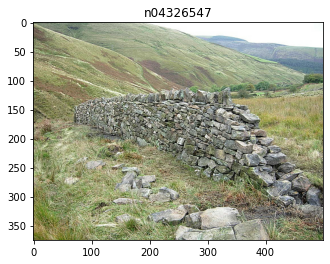

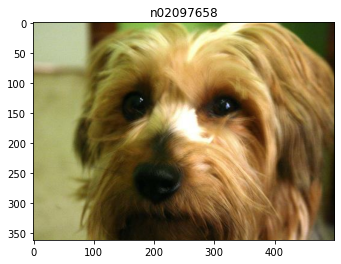

In [6]:
for image, label in imagenet_train_ds.take(5):
    show(image, label)